In [16]:
import numpy as np
import matplotlib.pyplot as plt

***
### Código de ref.:

In [20]:
import numpy as np

N = 10       # Numero de intervalos no dominio
k_final = 10  # Numero de passos de tempo
L = 1.0      # Tamanho da barra
delta_x = L/N # delta x

# Existe uma restricao para o delta_t, dado um delta_x. O delta_t tem que ser menor
# do que delta_x ∗ delta x/2. Por isso, vamos definir um delta_t que obedeca a essa
# restricao. No seu trabalho voce vai ver o que acontece quando essa restricao
# nao eh obedecida.

delta_t = 0.2 * pow(delta_x, 2)

# Vamos definir o vetor temperatura como sendo formado por zeros, com N + 1 pontos.

Temp = np.zeros(N + 1, float)

# No entanto, o ponto da extremidade direita, que eh o N, tem valor 1.

Temp[N] = 1.0
print('Temperatura em t = 0: ', Temp)
Temp_nova = np.copy(Temp)

# Veja que agora os limites dos loops estao em funcao de k_final e N.

for k in range(1, k_final + 1):
    for i in range(1, N):
        Temp_nova[i] = Temp[i] + ( delta_t/(delta_x*delta_x) ) * (Temp[i+1] - 2.0*Temp[i] + Temp[i-1])
        Temp = np.copy(Temp_nova)

# Vamos escrever apenas o resultado final.

print('Temperatura em t = ', k*delta_t ,' : ', Temp)

Temperatura em t = 0:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Temperatura em t =  0.020000000000000004  :  [0.00000000e+00 3.44064000e-06 5.39361280e-05 5.14398618e-04
 3.36162456e-03 1.59930450e-02 5.75386766e-02 1.60952226e-01
 3.58655782e-01 6.52967417e-01 1.00000000e+00]


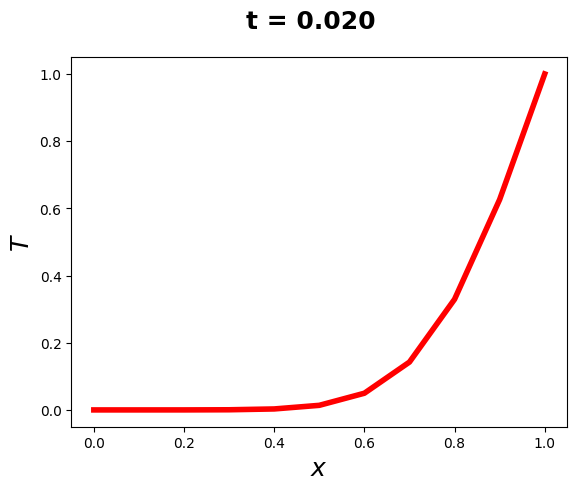

In [13]:
## Codigo do professor
import numpy as np
import matplotlib.pyplot as plt

N = 10
k_final = 10
L = 1.0

x = np.linspace(0.0, L, N + 1) # Vetor x , usado para plotar

delta_x = L/N
delta_t = 0.2 * delta_x * delta_x

Temp = np.zeros(N + 1, float)
Temp[N] = 1.0
Temp_nova = np.copy(Temp)

for k in range(1, k_final + 1):
    for i in range(1, N):
        Temp_nova[i] = Temp[i] + (delta_t/(delta_x*delta_x) ) * (Temp[i+1] - 2.0*Temp[i] + Temp[i-1])
    Temp = np.copy(Temp_nova)

t = k * delta_t # Tempo atual, usado no titulo do grafico

fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('t = %.3f'%t, fontsize = 18, fontweight = 'bold')
ax.set_ylabel('$T$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)

plt.plot(x, Temp, '-r', lw = 4)
plt.savefig('figura.pdf', format ='pdf', dpi = 1200, bbox_inches = 'tight')

plt.show()

***
### Proposta.:
Apresente a solução de cada problema em diferentes instantes de tempo (escolha pelo menos 4 instantes de tempo para cada caso: um no começo, dois intermediários e um representando o regime permanente, ou seja, para t grande). Comente o que acontece com o perfil de temperatura quando t→ ∞. É o esperado? Compare a solução em cada tempo com a solução analítica. Resolva com diferentes valores de Delta_x e compare os resultados. Em todos os problemas deve ser analisada também a dependência da solução com o tamanho do Delta_x e do Delta_t escolhidos. Atenção: devemos ter sempre Delta_t"<"Delta_x²/2. O que acontece quando essa condição não é obedecida? Faça alguns testes. Investigue também qual é a influência de alpha na solução. Os códigos desenvolvidos devem ser enviados separadamente.:

***
### Resolução Problema 1.:
#### Aproximada
Condições de contorno T(0,t) = 0 e T(L,t) = 0 para t>=0 ; T(x,0) = 1 para 0"<"x"<"L

Delta_t: 0.0020000000000000005
Temperatura para k =  10 : [0.         0.37381519 0.67066153 0.85712169 0.94743695 0.97265961
 0.94743695 0.85712169 0.67066153 0.37381519 0.        ]


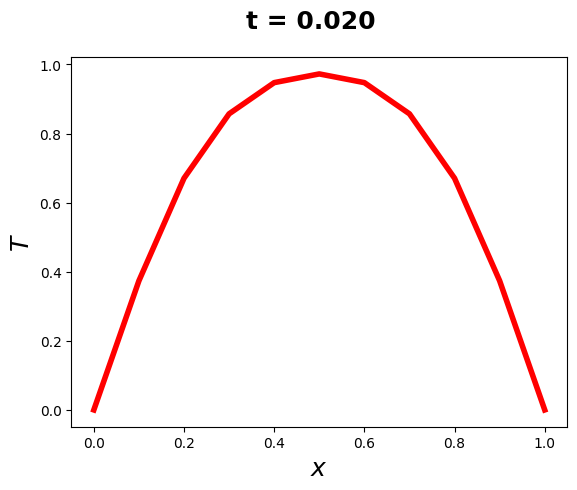

In [37]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
k_final = 10
L = 1

x = np.linspace(0.0, L, N + 1) # Vetor x , usado para plotar

delta_x = L/N
delta_t = 0.2 * delta_x * delta_x
print("Delta_t:", delta_t)

#Temperatura para o instante inicial
Temp = np.ones(N + 1, float)    # T(x,0) = 1
Temp[0] = 0                     # T(0,t) = 0
Temp[N] = 0                     # T(L,t) = 0
Temp_nova = np.copy(Temp)

for k in range(1, k_final + 1):
    for i in range(1, N):
        Temp_nova[i] = Temp[i] + (delta_t/(delta_x*delta_x) ) * (Temp[i+1] - 2.0*Temp[i] + Temp[i-1])
    Temp = np.copy(Temp_nova)

print('Temperatura para k = ', k, ':', Temp)

t = k * delta_t # Tempo atual, usado no titulo do grafico

fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('t = %.3f'%t, fontsize = 18, fontweight = 'bold')
ax.set_ylabel('$T$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)

plt.plot(x, Temp, '-r', lw = 4)
plt.savefig('figura1.pdf', format ='pdf', dpi = 1200, bbox_inches = 'tight')

plt.show()

***
### Resolução Problema 2.:
#### Aproximada
Condições de contorno T(0,t) = 1 e T(L,t) = 0 para t>=0 ; T(x,0) = 0 para 0"<"x"<"L

Delta_t: 0.0020000000000000005
Temperatura para k =  10 : [1.00000000e+00 6.26181530e-01 3.29289626e-01 1.42427546e-01
 4.96746496e-02 1.36701952e-02 2.88839680e-03 4.50764800e-04
 4.88448000e-05 3.27680000e-06 0.00000000e+00]


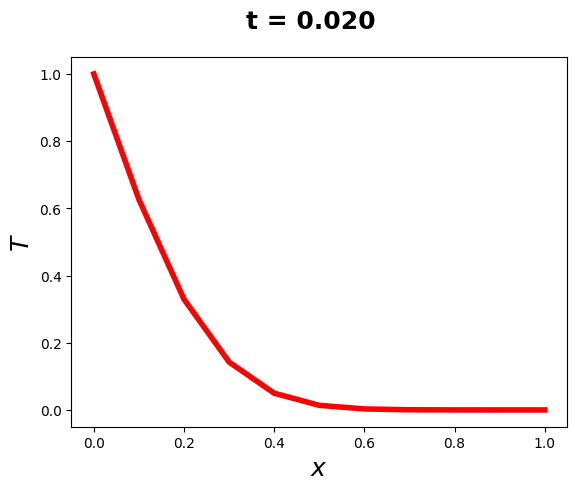

In [36]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
k_final = 10
L = 1

x = np.linspace(0.0, L, N + 1) # Vetor x , usado para plotar

delta_x = L/N
delta_t = 0.2 * delta_x * delta_x
print("Delta_t:", delta_t)

#Temperatura para o instante inicial
Temp = np.zeros(N + 1, float)    # T(x,0) = 0 e T(L,t) = 0
Temp[0] = 1                     # T(0,t) = 1
Temp_nova = np.copy(Temp)

for k in range(1, k_final + 1):
    for i in range(1, N):
        Temp_nova[i] = Temp[i] + (delta_t/(delta_x*delta_x) ) * (Temp[i+1] - 2.0*Temp[i] + Temp[i-1])
    Temp = np.copy(Temp_nova)

print('Temperatura para k = ', k, ':', Temp)

t = k * delta_t # Tempo atual, usado no titulo do grafico

fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('t = %.3f'%t, fontsize = 18, fontweight = 'bold')
ax.set_ylabel('$T$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)

plt.plot(x, Temp, '-r', lw = 4)
plt.savefig('figura2.pdf', format ='pdf', dpi = 1200, bbox_inches = 'tight')

plt.show()

***
### Resolução Problema 3.:
#### Aproximada
Condições de contorno T(0,t) = 0 e T(L,t) = 0 para t>=0 ; T(x,0) = sin(pi*x/2) para 0"<"x"<"L

Delta_t: 0.008000000000000002
Temperatura para k =  10 : [0.         0.25358031 0.48233841 0.66388187 0.78043995 0.82060312
 0.78043995 0.66388187 0.48233841 0.25358031 0.        ]


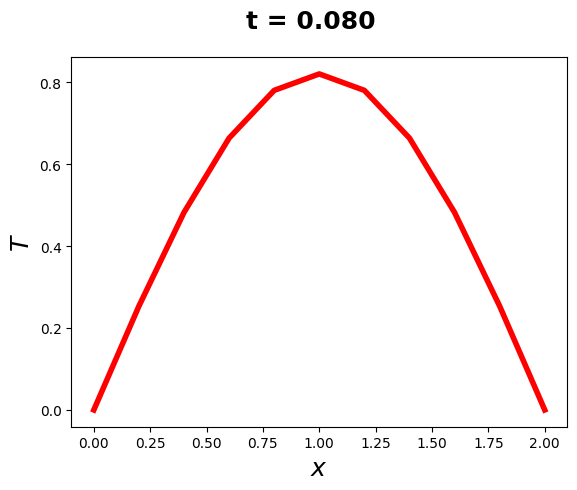

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import math

N = 10
k_final = 10
L = 2

x = np.linspace(0.0, L, N + 1) # Vetor x , usado para plotar

delta_x = L/N
delta_t = 0.2 * delta_x * delta_x
print("Delta_t:", delta_t)

#Temperatura para o instante inicial
Temp = np.zeros(N + 1, float)
for space in range(N):
    Temp[space] = math.sin(math.pi*space*delta_x/2)   # T(0,t)=T(L,t)=0 e T(x,0) = sin(pi*x/2)
    
Temp_nova = np.copy(Temp)

for k in range(1, k_final + 1):
    for i in range(1, N):
        Temp_nova[i] = Temp[i] + (delta_t/(delta_x*delta_x) ) * (Temp[i+1] - 2.0*Temp[i] + Temp[i-1])
    Temp = np.copy(Temp_nova)

print('Temperatura para k = ', k, ':', Temp)

t = k * delta_t # Tempo atual, usado no titulo do grafico

fig = plt.figure()
ax = fig.add_subplot()

fig.suptitle('t = %.3f'%t, fontsize = 18, fontweight = 'bold')
ax.set_ylabel('$T$', fontsize = 18)
ax.set_xlabel('$x$', fontsize = 18)

plt.plot(x, Temp, '-r', lw = 4)
plt.savefig('figura3.pdf', format ='pdf', dpi = 1200, bbox_inches = 'tight')

plt.show()